<a href="https://colab.research.google.com/github/tsupine/dali-data/blob/main/store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data exploration, reading the datasets


we first experiment with interactive plots and then good old fashioned seaborn library. Initially, importing our libraries:

In [3]:
# Importing necessary libraries

import pandas as pd         # Import pandas for data manipulation and analysis
import numpy as np          # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for basic plotting functionalities
import seaborn as sns        # Import seaborn for statistical data visualization



In [7]:
# Clone the repository
!git clone https://github.com/tsupine/dali-data.git

# Navigate to the cloned repository
%cd dali-data


Cloning into 'dali-data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 4), reused 4 (delta 2), pack-reused 0
Receiving objects: 100% (19/19), 1.20 MiB | 3.87 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/dali-data


In [8]:
data = pd.read_csv("Sample - Superstore.csv", encoding_errors="ignore")



In [9]:
print(data.columns)
print(data.size)

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')
219868


In [10]:
data.head(5)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1.0,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,1,NaN,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,2,3.0,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,3,4.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310
4,4,5.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164


First, some intital data cleaning! We get rid of the NA values by sustituuting in placeholder values that doesnt interfere with our modeling. We also delete the column unnamed as in it seems to just indicate the order of entering the data.



* We are replacing the missing values in numeric columns with the mean or median of the respective column. This helps to maintain the central tendency of our data.

* We are filling the missing values in text columns with a placeholder - eg. Unknown. We might decide to discard these points later. to see this, we need to decide on whether we have enough data points to take this risk


In [16]:

if 'Unnamed: 0' in data.columns:
    data['Row ID']=data['Unnamed: 0']+1
    data.drop('Unnamed: 0', axis=1, inplace=True)
    print("Column 'Unnamed: 0' dropped.")


data['Product Name'].fillna('Unknown', inplace=True)
data['Customer Name'].fillna('Unknown', inplace=True)



#this changes the values when the code runs multiple times, hence we make a second database to preserve the original values.

data_ed = data

data_ed['Sales'].fillna(data['Sales'].mean(), inplace=True)
data_ed['Quantity'].fillna(data['Quantity'].median(), inplace=True)
data_ed['Discount'].fillna(data['Discount'].mean(), inplace=True)
data_ed['Profit'].fillna(data['Profit'].median(), inplace=True)


In [12]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.864435,2.0,0.00000,41.9136
1,2,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000,3.0,0.00000,219.5820
2,3,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2.0,0.00000,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5.0,0.15569,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2.0,0.20000,2.5164


We notice that the product id is a combination of the type of product, subcategory and some other number. similarly, customer id is people's last names, surnames and some unique number. We note that these two unique numbers are distinct.

In [17]:
# sns.pairplot(data)
# plt.show()

## Initial variable selection - numeric correlation

<ipython-input-18-0a0cea474d03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

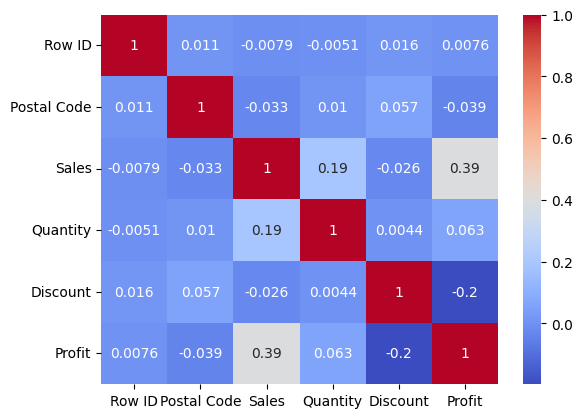

In [18]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


In [ ]:
print('github is going to fucking end us')
print("no actually we were just silly and didn't know how forking worked")

github is going to fucking end us
no actually we were just silly and didn't know how forking worked


In [19]:
!git add .
!git commit -m "committing all this"


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ac80893e939e.(none)')


In [ ]:
!git push origin master
